In [32]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Logistic Regression
In this exercise, you will explore the characteristics of the logistic classifier. 
The figure below shows a schematic of a multivariate logistic regression classifier.
<div class="has-text-centered">
<figure class="image is-inline-block" >

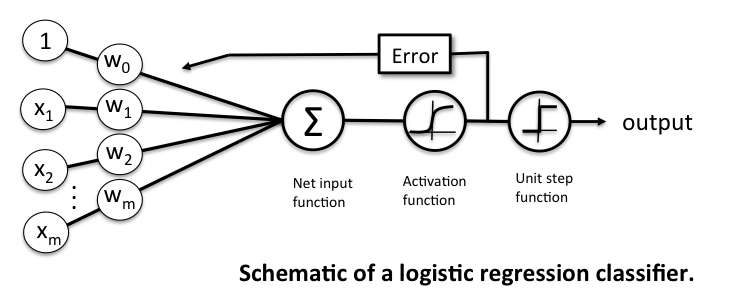


</figure>
</div>
A Logistic regression classifier consists of 3 distinct parts:

1. A multivariate linear function : $z=\mathbf{w}^{\top} \mathbf{x}= \sum_i w_i * x_i + b$

2. The sigmoid activation function $\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$ 

3. A binary step function (thresholding) at $\sigma(z)>0.5$.


## The manual logistic (regression) classifier

---
**Task 1 (medium): Implementing the sigmoid function👩‍💻**
In the following task you will implement and visualize a `sigmoid`
 function along with the decision boundary.
1. Implement the function `sigmoid`
, that given an input `x`
 and the model parameters, returns the output of the sigmoid function.

2. Plot the function values of `sigmoid`
 using `xs`
 as input features.

3. Modify the weight parameter `w`
 of the `sigmoid`
 function. What happens to the function when `w`
:
    - is small? (does it look semilar to another function?)
    - is large? 
    - is zero?


4. How does a change of the bias `b`
 affect the output of `sigmoid`
?

5. Determine the x-values of the decision boundary (x-value where $\sigma(x)=0.5$) for the _logistic regression_-classifier. **Hint**: z must be zero in 
$\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$ for $\sigma=0.5$, hence solve $b + w x = 0$



---

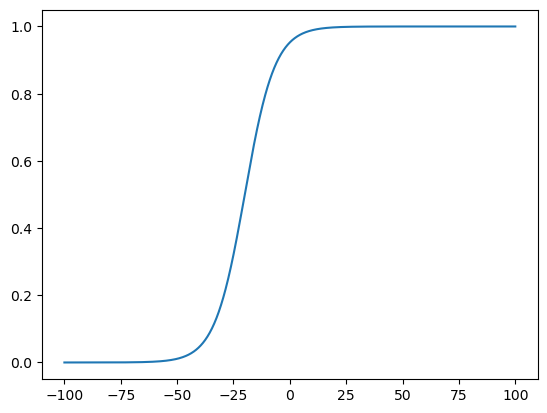

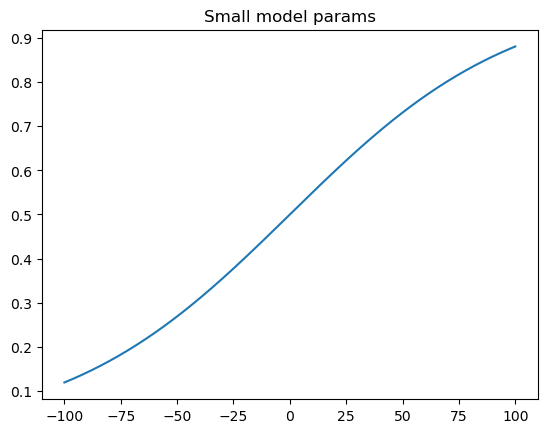

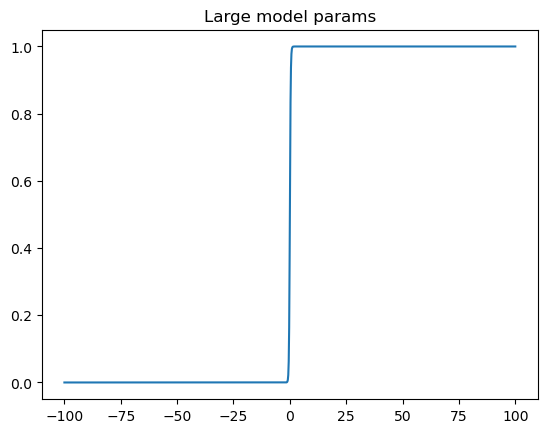

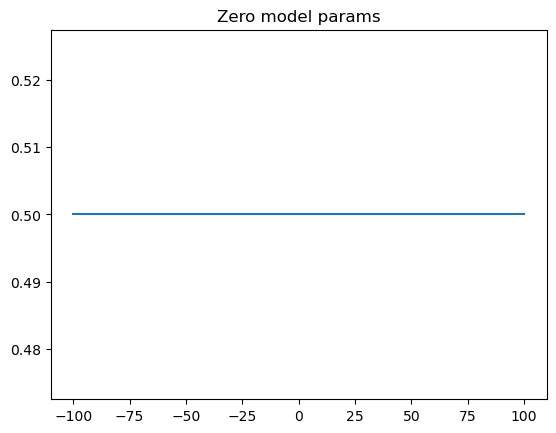

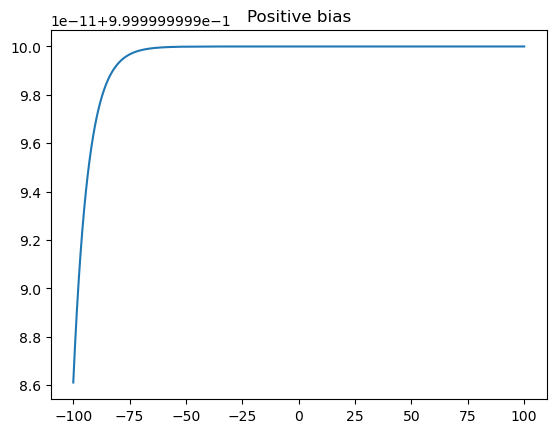

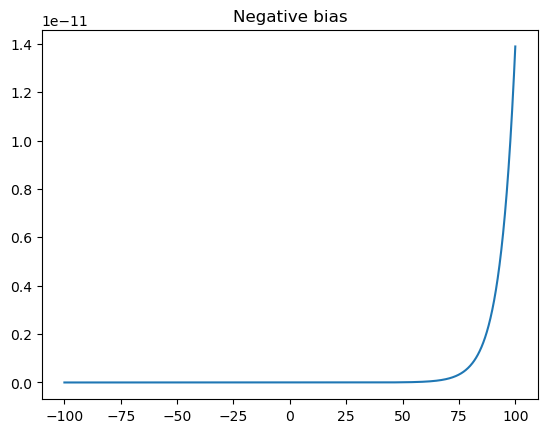

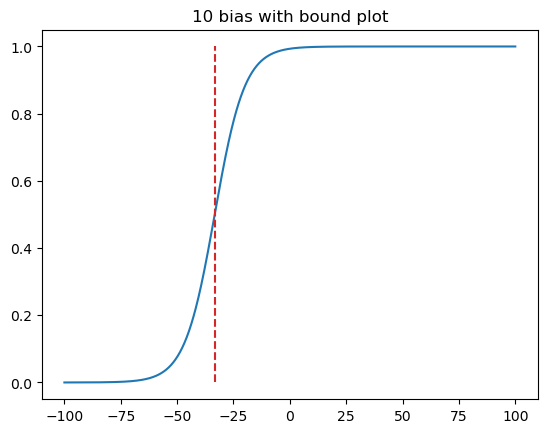

In [2]:
import math

# Task 1
def sigmoid(xs,b,w) :  # sigmoid function
    """
    :param xs: 1D array of the (single) input-feature values.
    :param b: The bias parameter of the model.
    :param W: The weight parameter of the model.
    
    :return: output values of the sigmoid function. 
    """
    sigmoid_results = []

    for _, v in np.ndenumerate(xs):

        z = w*v + b # Is the first of the linear functions(the multivariate function) this is the same as the calculation w^Tx
        sig_result = 1/(1+math.exp(-z))

        sigmoid_results.append(sig_result)

    return np.array(sigmoid_results)



# Task 2
xs = np.linspace(-100,100,1000) ### linspace of "input features"
params = np.array([3.0,0.15]) ### parameters of the model

def plot_sigmoid(xs, b, w, plot_func=None, title=""):

    sigmoid_results = sigmoid(xs, b, w)

    plt.plot(xs, sigmoid_results)
    plt.title(title)
    if plot_func != None:
        plot_func(b, w)
    plt.show()

plot_sigmoid(xs, params[0], params[1])

# Task 3

plot_sigmoid(xs, 0, 0.02, title="Small model params")
plot_sigmoid(xs, 0, 5.4, title="Large model params")
plot_sigmoid(xs, 0, 0, title="Zero model params")

# Task 4 
# The bias b, makes the "threshold" line move in either direction. In this example, if the bias is positive then the threshold line moves in a negative direction and vice versa
b1 = 40
b2 = -40

plot_sigmoid(xs, b1, params[1], title="Positive bias")
plot_sigmoid(xs, b2, params[1], title="Negative bias")

# Task 5 - This is not solved the comment below was my first intuition about it, however the actual implementation is based on a solution on the website
# Since boundary is b is 0 then we can remove that reducing it to wx = 0. 
# We then move the parameters, w, to the right side with division so that x = 0/w which is equal to x = 0
# In the scenario where b is not 0 then we end up with the following equation x = (0/w)-b. Since 0/w gives 0,
# the function can be deduced to x = -b

def get_boundary(b,w):
    if b == 0:
        return 0
    else:
        return -(b/w)

def with_boundary(b, w):
    Decision_boundary = get_boundary(b,w)
    plt.plot([Decision_boundary, Decision_boundary],[0,1],'--C3',label = 'decision boundary')

plot_sigmoid(xs, 5, params[1], with_boundary, title="10 bias with bound plot")


We generate two classes (`class1`
 and `class2`
) of data, drawn from normal distributions (with a different mean and variance)


In [3]:
### 2 classes of randomly generated data

x1= np.random.normal(-50,20,200)
y1 = np.zeros_like(x1)
x2= np.random.normal(50,30,200)
y2 = np.ones_like(x2)

`x1`
 and `x2`
 are the variables for the input features of `class1`
 and `class2`
, respectively. 
Likewise, `y1`
 and `y2`
 are the targets of `class1`
 and `class2`
, respectively. 
The following cell visualizes the data of the classes together with the `sigmoid`
 values and the decision boundary. 


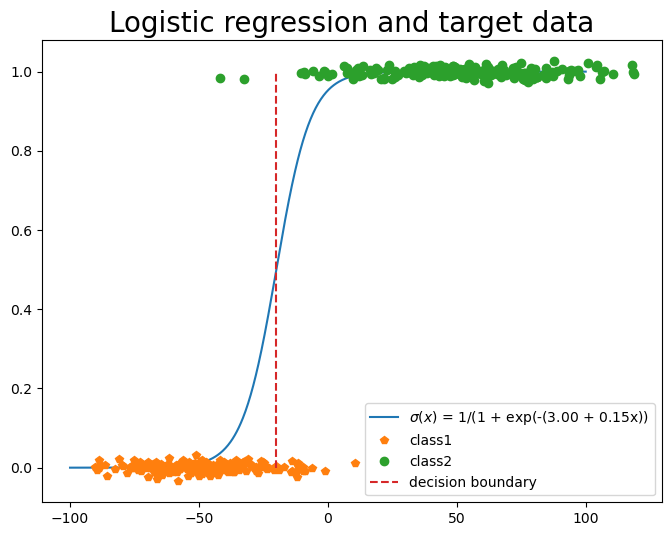

In [4]:
plt.figure(figsize=(8,6))
plt.plot(xs, sigmoid(xs,params[0],params[1]),label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot(x1, y1+np.random.normal(0,0.01,200),'p',label ='class1')
plt.plot(x2, y2+np.random.normal(-0,0.01,200),'o',label = 'class2')
plt.plot([-params[0]/params[1],-params[0]/params[1]],[0,1],'--C3',label = 'decision boundary')

plt.title(r"Logistic regression and target data", fontsize=20)
plt.legend()
plt.show()


---
**Task 2 (medium): The prediction function👩‍💻**
Implement the function `predict`
 in the cell below using `sigmoid`
 to predict the class of data given input-features and model parameters.

---

In [5]:
def predict(x,w):
    """
    :param x: 1D array of the (single) input-feature values.
    :param w: The list of the model parameters, [bias, weight]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    boundary_x = get_boundary(w[0], w[1])
    boundary = 1/(1+math.exp(w[0]+w[1]*boundary_x))
    sigmoid_results = sigmoid(x, w[0], w[1])

    return np.array([v >= boundary for i, v in np.ndenumerate(sigmoid_results)])

The cell below visualizes the predictions.


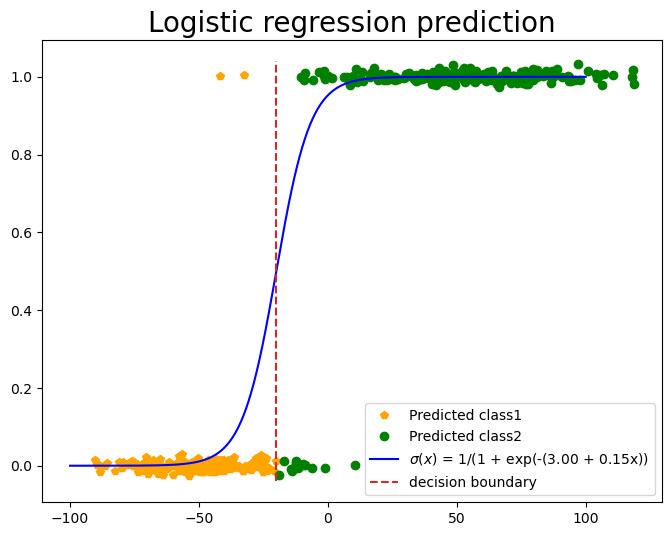

In [6]:
x_all = np.concatenate([x1,x2])
y_all = np.concatenate([y1+np.random.normal(0,0.01,200),y2+np.random.normal(-0,0.01,200)])
y_bool = predict(x_all,params)
plt.figure(figsize=(8,6))
plt.plot(x_all[~y_bool], y_all[~y_bool],'p',color='orange',label ='Predicted class1')
plt.plot(x_all[y_bool], y_all[y_bool],'go',label = 'Predicted class2')
plt.plot(xs, sigmoid(xs,params[0],params[1]),'b',label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot([-params[0]/params[1],-params[0]/params[1]],[-0.04,1.04],'--C3',label = 'decision boundary')
plt.title(r"Logistic regression prediction", fontsize=20)
plt.legend()
plt.show()


---
**Task 3 (medium): Evaluation👩‍💻💡**
1. Which model parameters `w`
 for the logistic classifier best seperate (visually) the two classes?
2. Determine the accuracy (fraction of correct predictions) of the classifier. 


**Tip**
You can use the accuracy function from the previous exercise.


---

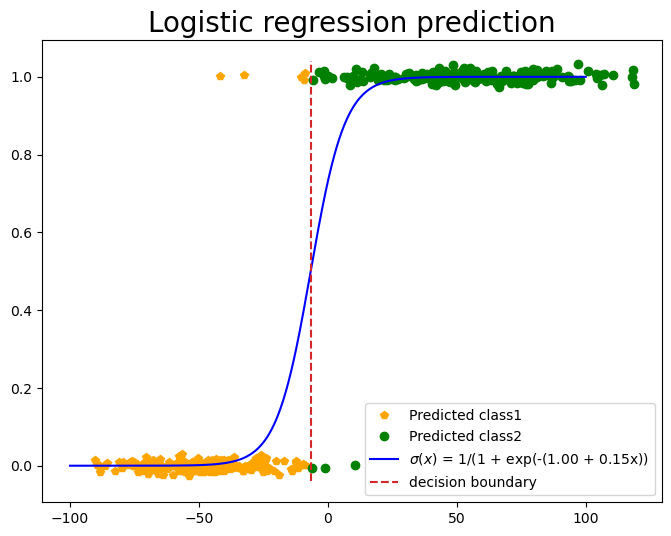

It seems like that the best classifier parameters is the one where the bias is a little less then the original.
Params(b,w):  [1, 0.15]
Accuracy is:  0.98


In [20]:
opt_params = [1, 0.15]

# Task 1
def plot_accur(params):
    y_bool = predict(x_all,params)
    plt.figure(figsize=(8,6))
    plt.plot(x_all[~y_bool], y_all[~y_bool],'p',color='orange',label ='Predicted class1')
    plt.plot(x_all[y_bool], y_all[y_bool],'go',label = 'Predicted class2')
    plt.plot(xs, sigmoid(xs,params[0],params[1]),'b',label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
    plt.plot([-params[0]/params[1],-params[0]/params[1]],[-0.04,1.04],'--C3',label = 'decision boundary')
    plt.title(r"Logistic regression prediction", fontsize=20)
    plt.legend()
    plt.show()

plot_accur(opt_params)
print("It seems like that the best classifier parameters is the one where the bias is a little less then the original.")
print("Params(b,w): ", opt_params)

# Task 2
def accuracy(predictions,targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
     
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    correct = 0
    for idx, p in np.ndenumerate(predictions):
        if p == targets[idx] :
            correct = correct + 1
    
    return correct/targets.size

y_pred = predict(x_all, opt_params)
y_target = np.array([i > 199 for i in range(400)])
accur = accuracy(y_pred, y_target)
print("Accuracy is: ", accur)


---
**Task 4 (medium): Increasing input dimensions _(optional)_👩‍💻**
In this task the logistic regression function is modified to take 2 features as input (x,y).
1. Modify `sigmoid`
 such that it can take a tuple of two 1D-array variables as input.
2. Make a 3D-plot of the 2-variable sigmoid function. 
**Tip**
Use a meshgrid


3. Plot the decision boundary plane 
**Tip**
the plane where $z\in[0,1]$ and x,y such that $ b + w_1*x+w_2*y = 0 $ (why is this?)




---

In [21]:
# Task 1
def sigmoid2D(X,params) :  # sigmoid function
    """
    :param X: tuple of input features (x,y).
    :param parametes: List of the model parameters.
    :return: output values of the sigmoid function. 
    """
    # Write solutions here
    results = []
    x = X[0]
    y = X[1]

    for i, v in np.ndenumerate(x):
        xv = np.ones(params.shape[0])
        xv[1] = v
        xv[2] = y[i]

        z = params.T.dot(xv)
        results.append(1/(1+math.exp(z)))

# Write your code for the 3D plot here.

[[ 12.48028427  18.65277059   6.94995508   8.76860222  42.17059075
   24.41747473  22.01037308  22.91292326  30.18797648  19.19716456
   22.39424168  14.42360854   5.07682792  30.13498993   4.38470382
   29.32878531  18.46966548  31.96055845  33.2963697   22.94978546
   39.97850573  29.74320806  23.43492399  13.00252315  27.99678344
   20.25277441  14.45051374   6.43882449  52.43596921  27.26844441
   32.90968707  20.25735711  38.57903444  22.25709774   8.41732419
   19.93635411   0.15175378  17.59283629  13.01323171   6.83964696
   30.09179308  26.72941409  16.15136577  29.86770544  17.21790652
   26.16700334   9.53561297  26.73262792  22.33338707  13.09280027
   21.19886136  28.97428278  17.05408619  19.31332108  24.48168317
   18.8691387    6.08044092  19.34327209  25.87440567  23.57066233
   35.22827007  21.32290848   8.84506892   9.75201212  23.46980034
   15.10622496  15.41697823  19.16371268  28.01670746   4.89346756
   14.66793681  39.98392316  32.20487857  14.51365476  37.2010

Identically to above, we generate 2 classes (`class1`
 and `class2`
), but this time with two input features. 


In [23]:
S = 100*np.eye(2)
p1,q1 = np.random.multivariate_normal([20,8], S, 200).T
p2,q2 = np.random.multivariate_normal([-10,-13], S, 200).T

z1 = np.ones_like(q1)+np.random.normal(0,0.01,200)
z2 = np.zeros_like(q2)+np.random.normal(0,0.01,200)
print(z1)

[0.99614815 1.00388971 0.99504073 1.00210821 0.99736624 1.00156583
 1.03196936 1.00841665 1.00649356 1.01010064 1.0138859  1.00695446
 0.98078687 1.00107988 1.00714485 1.00598414 1.0024625  0.99035222
 0.98853339 1.0076824  0.99986415 1.00824939 0.99470449 0.99674322
 0.99812506 1.00204554 1.01263309 0.98998885 1.00005824 1.00860306
 0.99737734 1.01013119 1.00486881 0.98380483 1.00429188 1.01143202
 1.00792679 1.01102238 1.01356706 0.99940132 0.99393706 0.98827728
 0.99394126 0.98928617 0.99940655 0.98781235 1.01527379 0.98905054
 0.98799203 1.01369382 0.98817139 1.00879539 1.01055746 0.97110322
 1.004827   1.01089818 0.99334353 0.99741251 1.00007337 0.99391559
 1.02332533 0.99524899 0.99051569 1.01877865 0.99665036 0.98734205
 1.0103991  1.00966287 0.99420507 0.99238317 0.99725469 1.00972419
 0.99840726 0.99722798 0.98844923 1.00983127 0.99953565 0.99441551
 0.9922578  1.01402959 1.00900211 0.99678485 1.00018702 0.99839334
 0.98241195 0.9837634  0.9811917  0.99844691 1.00285826 1.0081


---
**Task 5 (medium): 2D Extra _(optional)_👩‍💻💡**
1. Implement `predict2D`
, that can predict the binary class of the 2D data input. 
2. Use `predict2D`
 to determine the accuracy of the logistic classifier. 
3. Manually choose parameters that have an accuracy above $80\%$


---

In [ ]:
def predict2D(X,params):
    """
    :param x: tuple of 1D arrays of the input-feature values.
    :param params: The list of the model parameters, [bias, weight1, weight2]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    ...
#### Plotting

# Code you solution here


---
**Task 6 (medium): Reflection and plot 2D _(optional)_👩‍💻💡**
1. Plot the generated data together with the 2D input logistic function and decision boundary.
2. Make a 2D projection plot in the XY plane of the decision boundary and the data points. Plot class 1 as blue and class 2 as red. 
**Tip**
Ignore the z-dimension.


3. Consider the last exercise on decision boundaries: are there any similarities between the linear descision boundary and the current 2D projection plot?


---

In [ ]:
# Plotting data point along with the sigmoid
# Write your code for the 3D plot here.